# Monte Carlo Integration

Using random variables can be a very powerful way to integrate complicated functions especially in high dimensions. In this notebook we explore a few simple examples and work to build intuition on this concept. 
There is a real power in averages. *Both for good and evil.* ;-)

<img src="https://upload.wikimedia.org/wikipedia/commons/2/2f/Monaco_Monte_Carlo_1.jpg" />



<a href="https://www.numfys.net"><img class="logo" /></a>

## Monte Carlo Integration in 1 Dimension #

### Modules - Numerical Integration
<section class="post-meta">
By Tor Nordam
<br>
Last modified: Tom Abel 1/2021
</section>
___
This notebook will give a brief introduction to one dimensional numerical integration, comparing two naïve methods:

- Riemann Sum
- Monte Carlo integration with uniform sampling
- First steps in importance sampling
 

## Riemann sum ##
In the last lecture we did a midpoint Riemann sum as the simple and intuitive numerical integration scheme. We integrated a function on an interval of length $x$ by dividing the interval $[a..b]$ into $N$ sub-intervals of equal length $\Delta x = (b-a)/N$. We evaluate the function in the middle of each sub-interval and add the area of the sub-interval, $f(x_i) \Delta x$, to the total area, 

$$
\Delta x\sum_{i=1}^{N} f(x_i) = \frac{b-a}{N}\sum_{i=1}^{N} f(x_i).
$$

The following block of code produces a plot which visualizes the Riemann sum procedure

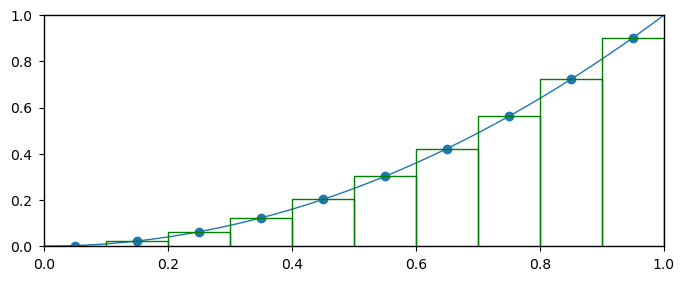

In [1]:
# These lines import the numpy library, set up matplotlib
# to be used directly in the notebook 
# Note that in Python 3,  1/2 = 0.5 instead of 1/2 = 0
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Set common figure parameters:
newparams = {'axes.labelsize': 11, 'axes.linewidth': 1, 'savefig.dpi': 300, 
             'lines.linewidth': 1.0, 'figure.figsize': (8, 3),
             'ytick.labelsize': 10, 'xtick.labelsize': 10,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,
             'legend.fontsize': 10, 'legend.frameon': True, 
             'legend.handlelength': 1.5}
plt.rcParams.update(newparams)

# Define a function to use as an example
def f(x):
    return x**2

# Clear plot and set limits
plt.clf()
start = 0
stop  = 1
plt.xlim(start, stop)
plt.ylim(start, stop)

# Plot the function to be integrated, using 1000 points
# to get a smooth curve
X = np.linspace(start, stop, 1000)
plt.plot(X, f(X))

# Draw the rectangles used in the Riemann sum
# There are N rectangles
N  = 10
# Each has width dx
dx = (stop - start)/N
# Create a vector of the midpoints of each rectangle
X  = np.linspace(start + dx/2, stop - dx/2, N)
# Draw the midpoints as circles
plt.scatter(X, f(X))
# For each rectangle, draw the borders using a line plot
for x in X:
    plt.plot([x-dx/2, x-dx/2, x+dx/2, x+dx/2], [0,f(x), f(x), 0], color = "g")

Another way to think about what we are actually doing is that just multiply the length of the interval $b-a$ times the average function value, $\langle f \rangle$:

$$
(b-a) \langle f(x) \rangle
$$

I.e. $\langle f \rangle = \frac{1}{b-a}\int_a^b f(x) dx$. 
So we can think of the value of the integral of our function as the area of the rectangle with the height of the average value of $f$ in that interval, or also as the average of the areas of all rectangles formed with all values of $\langle f \rangle$ times $(b-a)$. 


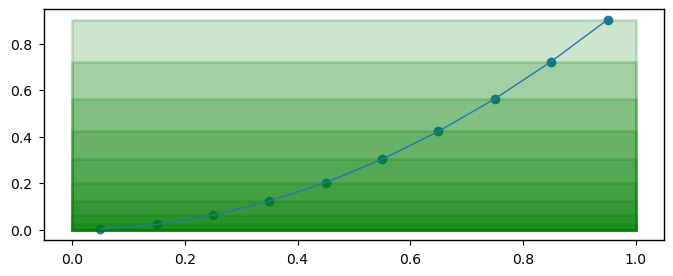

In [2]:
plt.plot(X, f(X))
plt.scatter(X, f(X))
# For each rectangle, draw the borders using a line plot
for x in X:
    plt.fill([0, 0, 1, 1], [0,f(x), f(x), 0], color = "g",alpha=.2, lw=2, )

In your statistics lecture this is known as [LOTUS, the law of the unconcious statistician](https://en.wikipedia.org/wiki/Law_of_the_unconscious_statistician) and is very useful!
LOTUS says:

$$\operatorname{E}[f(X)] = \sum_x f(x) {p}_X(x), \,$$

where ${p}_X(x)$ is the probability distribution function of the discrete random variable $X$. 
We use here the uniform distribution on the unit interval and so $p(x)=1$.  One can adapt the PDF from which one draws the random numbers to better fit the integrand. This practice is known as importance sampling and is useful to speed up Monte Carlo integrations dramatically at times. 

For continuous distributions this becomes:

$$\operatorname{E}[f(X)] = \int f(x) {p}_X(x)\, dx. $$



## Monte Carlo integration with uniform sampling ##
The simplest Monte Carlo integration scheme is essentially very similar to the Riemann sum method, except that the points where the function is to be evaluated are selected at random, instead of being equally spaced. Uniform sampling means that each point has the same probability of being selected. More advanced versions of Monte Carlo integration can for example use denser sampling in areas where the function value changes rapidly (*i.e.*, where the derivative of the function is large).

For a large number of random points, the integral obtained by the Monte Carlo method will approach the true value of the integral.

The following block of code produces a plot which visualises this Monte Carlo integration method.

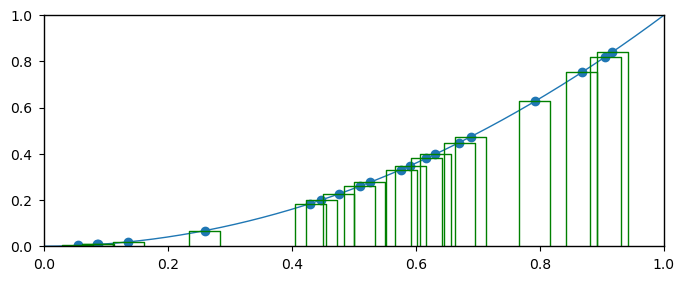

In [3]:
# Define a function to use as an example
def f(x):
    return x**2

# Clear plot and set limits
plt.clf()
start = 0
stop  = 1
plt.xlim(start, stop)
plt.ylim(start, stop)

# Plot the function to be integrated, using 1000 points
# to get a smooth curve
X = np.linspace(start, stop, 1000)
plt.plot(X, f(X))

# Draw the rectangles used in the Monte Carlo method
# There are N rectangles
N  = 20
# Each has width dx
dx = (stop - start)/N
# Create a vector of the midpoints of each rectangle,
# using uniform random numbers from the function np.random.random()
# This function returns numbers on the interval [0, 1).
# We scale the numbers to the interval [start, stop) by multiplying
# with the length of the interval, and adding the start point
# You can easily convince yourself that this works by confirming that
# 0 maps to start and 1 to stop.
X  = np.random.random(N)*(stop - start) + start
# Draw the midpoints as circles
plt.scatter(X, f(X))
# For each rectangle, draw the borders using a line plot
for x in X:
    plt.plot([x-dx/2, x-dx/2, x+dx/2, x+dx/2], [0,f(x), f(x), 0], color = "g")

In [4]:
np.random.random(5)

array([0.89246059, 0.74975944, 0.91303017, 0.85372146, 0.25728992])

## Defining functions for numerical integration ##
Next, we will define two functions for carrying out numerical integration using the Riemann sum, and the Monte Carlo method with uniform sampling. We will use the fact that in Python, it is possible to send a function as an argument to another function, in order to make general integrators that can be used on any function of one variable.

### Riemann sum ###

In [5]:
# The arguments to this function are:
#   f, the function to be integrated. Must take one argument only
#   N, the number of points to evaluate the function on
#   start, the start of the integration interval
#   stop, the end of the integration interval
def riemannSum(f, N, start, stop):
    # The width of each rectangle
    dx = (stop - start) / N
    # Array with the midpoint of each rectangle
    X = np.linspace(start + dx/2, stop - dx/2, N)
    # When f(x) is applied to an array, it returns an array 
    # of equal size, holding the result of applying the function
    # to each element of the original array. We take the sum 
    # of the resulting array, and multiply by dx
    return sum(f(X))*dx

### Monte Carlo ###

In [6]:
# The arguments to this function are:
#   f, the function to be integrated. Must take one argument only
#   N, the number of points to evaluate the function on
#   start, the start of the integration interval
#   stop, the end of the integration interval
def monteCarloIntegration(f, N, start, stop):
    # The width of each rectangle
    dx = (stop - start) / N
    # Array with the midpoint of each rectangle, from uniform random numbers
    R = np.random.random(N)*(stop - start) + start
    # When f(x) is applied to an array, it returns an array 
    # of equal size, holding the result of applying the function
    # to each element of the original array. We take the sum 
    # of the resulting array, and multiply by dx
    return sum(f(R))*dx

## Application 1 ##
Here, we will apply our two different integration schemes to calculate the simple integral
$$ \int_0^1 x^2 \;\mathrm{d}x = \frac{1}{3} $$
and compare the results. Observe that the Riemann sum generally works better for this example, *i.e.*, it gives better accuracy for the same number of function evaluations (the function is evaluated $N$ times in both cases). Note also that the Riemann sum always gives the same result, while the Monte Carlo method will fluctuate randomly. Observe how the accuracy of both increase when you increase the number of points, $N$.

In [7]:
# Simple example function
def f(x):
    return x**2

# Define the number of points and the interval
#np.random.seed(20)
N = 4
start = 0
stop  = 1
print('Riemann Sum: ', riemannSum(f, N, start, stop))
print('Monte Carlo: ', monteCarloIntegration(f, N, start, stop))

Riemann Sum:  0.328125
Monte Carlo:  0.3363040920096697


## Application 2 ##
Why do we bother talking about Monte Carlo integration when the Riemann sum seems work better? Because this is not always the case. Here, we will look at another example, the integral
$$ \int_0^1 \sin^2 \left( 20 \cdot 2\pi x \right)\; \mathrm{d}x = \frac{1}{2}.$$

In [21]:
# Simple example function
def f(x):
    return np.sin(20*2*np.pi*x)**2

# Define the number of points and the interval
N = 40
start = 0
stop  = 1
print('Riemann Sum: ', riemannSum(f, N, start, stop))
print('Monte Carlo: ', monteCarloIntegration(f, N, start, stop))

Riemann Sum:  1.0
Monte Carlo:  0.5489406728595512


So what happened here? The result of the Riemann sum is 1.0, while the result of the Monte Carlo integration is at least in the right neighbourhood. The reason is that the function we looked at, $f(x) = \cos^2 ( 20\cdot 2 \pi x)$, varies between 0 and 1, and has 40 local maxima on the interval from 0 to 1. Using the Riemann sum, we sampled at 40 points, an as it happens, those 40 points are exactly the 40 maxima. Observe that changing the number of points (even to 41) gives a better answer for the Riemann method.

This is of course an example which is constructed to make the Riemann sum method perform poorly, but the principle holds. For rapidly oscillating functions, the integration will be sensitive to where you choose to sample. In these cases, Monte Carlo integration may perform better than schemes which use equally distributed function evaluations.

## Bonus ##

Here are two blocks of code which will visualise the example above.

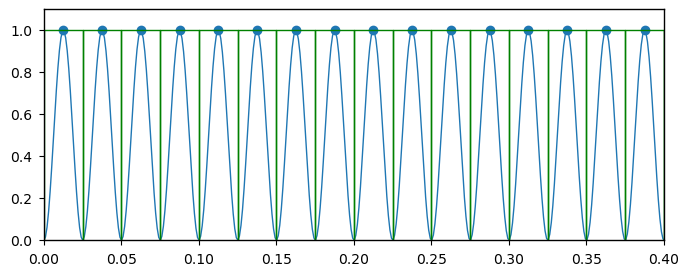

In [9]:
# The function to be integrated
def f(x):
    return np.sin(20*2*np.pi*x)**2

# Clear plot and set limits and figuresize
# We plot the interval from 0 to 0.4 only to make it easier to see
plt.clf()
plt.xlim(0, 0.4)
plt.ylim(0, 1.1)

# Plot the function to be integrated, using 1000 points
# to get a smooth curve
start = 0
stop  = 1
X = np.linspace(start, stop, 1000)
plt.plot(X, f(X))

# Draw the rectangles used in the Riemann sum
N  = 40
dx = (stop - start)/N
X  = np.linspace(start + dx/2, stop - dx/2, N)
# Draw the midpoints as circles
plt.scatter(X, f(X))
# For each rectangle, draw the borders using a line plot
for x in X:
    plt.plot([x-dx/2, x-dx/2, x+dx/2, x+dx/2], [0,f(x), f(x), 0], color = "g")

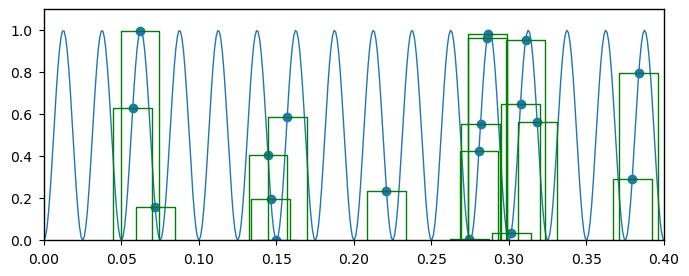

In [10]:
# The function to be integrated
def f(x):
    return np.sin(20*2*np.pi*x)**2

# Clear plot and set limits and figuresize
# We plot the interval from 0 to 0.4 only to make it easier to see
plt.clf()
plt.xlim(0, 0.4)
plt.ylim(0, 1.1)

# Plot the function to be integrated, using 1000 points
# to get a smooth curve
start = 0
stop  = 1
X = np.linspace(start, stop, 1000)
plt.plot(X, f(X))

# Draw the rectangles used in the Riemann sum
N  = 40
dx = (stop - start)/N
X  = np.random.random(N)*(stop - start) +  start
# Draw the midpoints as circles
plt.scatter(X, f(X))
# For each rectangle, draw the borders using a line plot
for x in X:
    plt.plot([x-dx/2, x-dx/2, x+dx/2, x+dx/2], [0,f(x), f(x), 0], color = "g")

## Simple Monte Carlo Integration to estimate $\pi$
One very nice feature of Monte-Carlo integration is that often complex boundaries can be accomodated easily. Especially in higher dimensions describing complex boundary conditions can be very cumbersome. For MC integration all that is usually needed is a function that gives one or zero if a point is in the domain or outside of it. Let us illustrate this on a classic example. 

0.00515188503814785

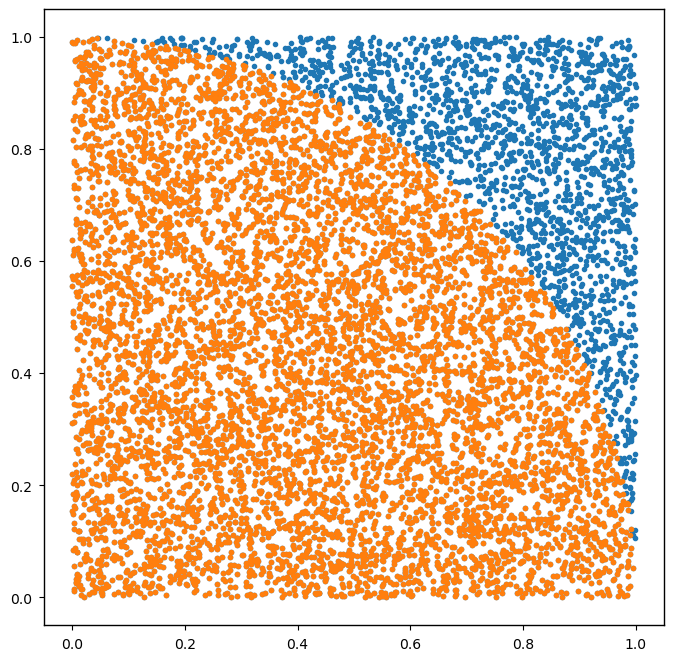

In [11]:
def mc_pi(N,plotit=False):
    p = np.random.random((2,N))
    r = np.sqrt(p[0,:]**2+p[1,:]**2)
    circ = (np.where(r<=1.))[0]
    if (plotit==True):
        fig = plt.figure(figsize=(8,8))
        plt.plot(p[0,:], p[1,:], '.',(p[0,circ]), (p[1,circ]), '.');
    err = np.fabs(float(len(circ))/N*4-np.pi)/np.pi
    return err
mc_pi(9000,plotit=True)

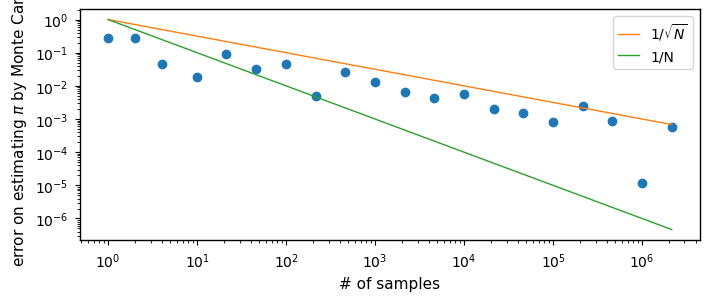

In [22]:
np.random.seed(80)
Ns = np.int64(np.power(10.,np.arange(20)/3.))
pia = np.zeros(len(Ns))
for i in range(len(Ns)):
    pia[i] = mc_pi(Ns[i])

plt.loglog(Ns,pia,'o')
plt.plot( Ns, 1./np.sqrt(Ns), label=r"$1/\sqrt{N}$")
plt.plot( Ns, 1./Ns, label=r"1/N")
plt.ylabel('error on estimating $\pi$ by Monte Carlo')
plt.xlabel('# of samples')
plt.legend()

## Exercises: 

### Quasi random, regular, and random uniform distributions
- So far we have sampled from a uniform distribution. 
- Repeat the example of calculating $\pi$ above using a uniform grid (lattice) of sampling points.
  - Carry out the same analysis and plot the error as a function of the number of samples as we did before
- Scipy comes with a package for quasi Monte Carlo methods. Specifically we will try a [Halton sequence](https://en.wikipedia.org/wiki/Halton_sequence) to generate a quasi random distribution.


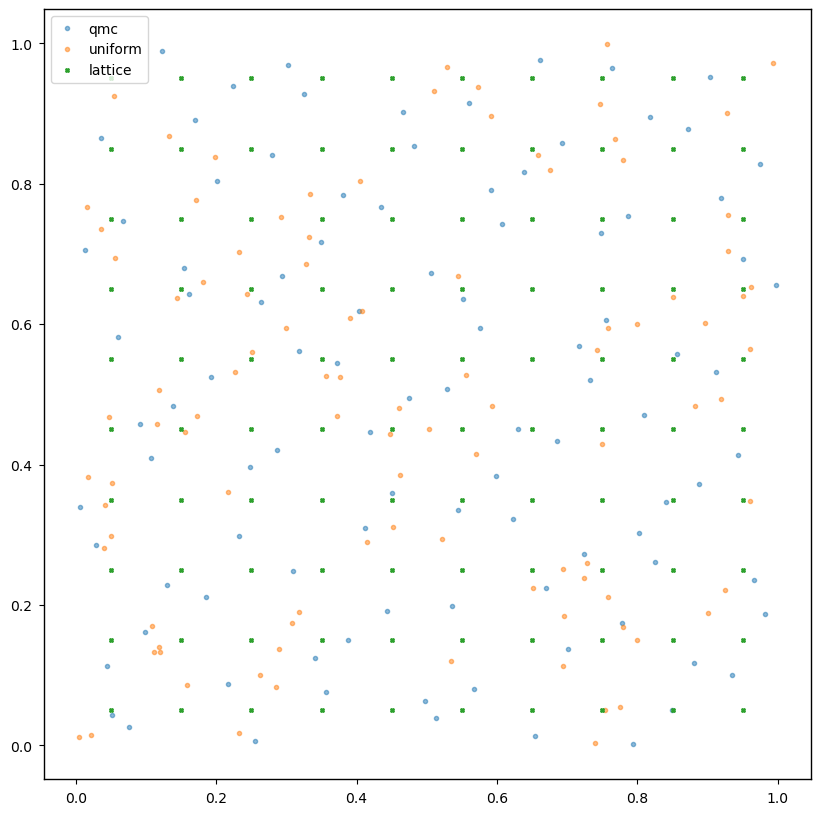

In [23]:
from scipy.stats import qmc
sampler = qmc.Halton(d=2, scramble=True)
Ns = 100
sample = sampler.random(n=Ns)
uni = np.random.uniform(size=(Ns,2))
N = 10
x = (np.arange(0,N)+0.5)/N
x,y = np.meshgrid(x,x)
x = x.flatten()
y = y.flatten()
plt.figure(figsize=(10,10))
plt.plot(sample[:,0],sample[:,1],'.',alpha=0.5,label='qmc')
plt.plot(uni[:,0],uni[:,1],'.',alpha=0.5,label="uniform")
plt.plot(x,y,'X',ms=2.7,label="lattice")
ax = plt.gca()
ax.set_aspect("equal")
plt.legend()

In [32]:
def approximate_pi(points):
    r = points[:,0]**2 + points[:,1]**2
    est = 4*np.sum(r<=1)/r.shape[0]
    return est, (est - np.pi) / np.pi

In [33]:
print("QMC: ", approximate_pi(sample))
print("Uniform: ", approximate_pi(uni))
print("Lattice: ", approximate_pi(np.array([x,y]).T))

QMC:  (3.24, 0.031324031235481886)
Uniform:  (3.12, -0.006873155106573032)
Lattice:  (3.16, 0.005859240340778607)


In [35]:
from tqdm import tqdm

In [45]:
Ns = np.round(np.logspace(0, 5, 1000, base = 10)).astype(int)
error_qmc = np.array([approximate_pi(sampler.random(n=n))[1] for n in tqdm(Ns)])
error_uni = np.array([approximate_pi(np.random.uniform(size=(n,2)))[1] for n in tqdm(Ns)])

x = (np.arange(0,N)+0.5)/N
x,y = np.meshgrid(x,x)
x = x.flatten()
y = y.flatten()

error_lat = []
for ns in tqdm(Ns):
    n = np.round(np.sqrt(ns))
    x = (np.arange(0,n)+0.5)/n
    x,y = np.meshgrid(x,x)
    x = x.flatten()
    y = y.flatten()
    error_lat.append(approximate_pi(np.array([x,y]).T)[1])

100%|██████████| 1000/1000 [00:00<00:00, 4924.91it/s]


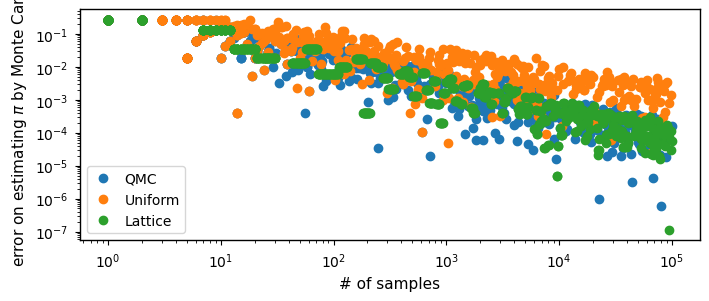

In [48]:
plt.loglog(Ns, error_qmc, 'o', label="QMC")
plt.loglog(Ns, error_uni, 'o', label="Uniform")
plt.loglog(Ns, error_lat, 'o', label="Lattice")
plt.ylabel('error on estimating $\pi$ by Monte Carlo')
plt.xlabel('# of samples')
plt.legend()

We phrased the integration above as a way to find $\pi$. Alternatively let us think about this procedure looking at which fraction of points is within the ball as finding the volume of the ball and look at this for higher dimensions. 
Analytically the [volume of a n-dimensional ball](https://en.wikipedia.org/wiki/Volume_of_an_n-ball) is $$V_n(R) = \frac{\pi^{n/2}}{\Gamma\bigl(\tfrac n2 + 1\bigr)}R^n$$.

In [14]:
from scipy.special import gamma # Euler's gamma function
n=3
np.pi**(n/2)/gamma(n/2+1), 4/3 * np.pi  # check our formula. Do we get what we expect for dimension 3 ? 

(4.188790204786391, 4.1887902047863905)

Now pick a high dimension. Say $n = 20$, or $n=20,000$?. Think through and try out applying the uniform lattice points method as well as the random sampling (and also quasi-random if you have time) and see how close your estimate with the monte carlo approximates the analytical formula for the volume above. How do the number of points of the uniform lattice change with the increasing dimension? How does that compare to the random sampling method? 


### Importance sampling
- See whether we can implement importance sampling for a simpler example.
- We try to recreate [this example](https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/variance-reduction-methods) at the very end of that link. It integrates $\sin(x)$ on $[0..\pi/2]$ using a linear PDF 
  
<img src="https://www.scratchapixel.com/images/monte-carlo-methods-practice/importancesamplingexample.png?">

- We want to see whether we can recreate their result 
      
<img src="https://www.scratchapixel.com/images/monte-carlo-methods-practice/importancesampling04.png?"> 
  
in this notebook here. 


In [15]:
def importanceSamp(N):
    r = np.random.random(N)
    xi = np.sqrt(r)*np.pi*0.5
    sumu = np.sum(np.sin(r*np.pi*0.5)) * (np.pi * 0.5) / N
    sumi = np.sum(np.sin(xi)/((8*xi/np.pi**2))) /N
    return sumu, sumi

importanceSamp(1000)


(0.9847304034676927, 1.0049751340739332)

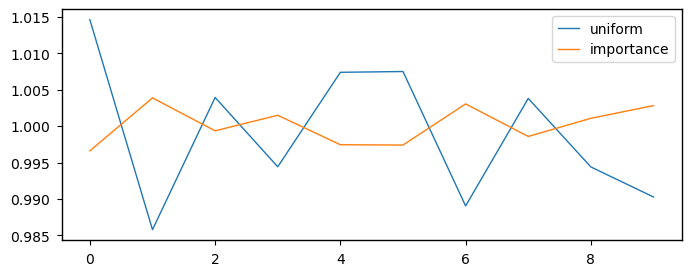

In [16]:
res = np.zeros((2,10))
Ns = 2000
for i in range(10):
    res[0,i], res[1,i] = importanceSamp(Ns)

plt.plot(range(10),res[0,:], label="uniform")
plt.plot(range(10),res[1,:], label="importance")
plt.legend();

## More information
[Computational Statistics with Python](https://people.duke.edu/~ccc14/sta-663/MonteCarlo.html) has also a few more interesting pointers on variance reduction and some of the advantages of Monte Carlo Integration. 

We will encounter this again when we talk about Ising models, curve fitting, model selection, and also in many transport problems. Radiation transport, neutron transport, etc. are very successfully modeled with Monte Carlo techniques. 
